In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


df_evo = pd.read_csv('csv/Evolution_DataSets.csv')

# Seleccionar las especies de interés
especies_de_interes = ['Homo Neanderthalensis\n', 'Homo Erectus', 'Homo Sapiens', 'Homo Habilis', 'Homo Heidelbergensis']
df_especies_de_interes = df_evo[df_evo['Specie'].isin(especies_de_interes)]

# Seleccionar las características y la variable objetivo
features = ['Cranial_Capacity', 'Height']
target = ['Specie']
X = df_especies_de_interes[features].values
y = df_especies_de_interes[target].values.ravel()

In [29]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo de regresión logística
modelo = LogisticRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = modelo.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precisión del modelo:", accuracy)
print("Matriz de confusión:")
print(conf_matrix)

Precisión del modelo: 0.378
Matriz de confusión:
[[39 25  1 17 17]
 [27 67  0 10  0]
 [ 8  0 45 17 36]
 [42  5 14 12 32]
 [22  0 29  9 26]]


C:\sw\jupyter\jupyter_1\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


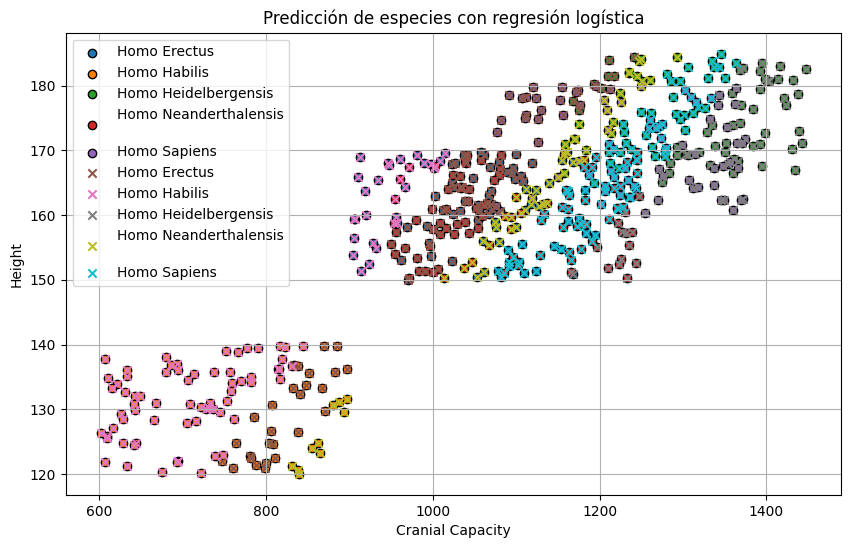

In [35]:
# Obtener las clases únicas de especies
classes = np.unique(y)

plt.figure(figsize=(10, 6))
for cls in classes:
    idx = np.where(y_test == cls)[0]  # Obtener los índices de las muestras de la clase actual
    plt.scatter(X_test[idx, 0], X_test[idx, 1], label=cls, edgecolors='k')  # Usar los índices para seleccionar las muestras y plotearlas

# Plotear los puntos predichos
for cls in classes:
    idx = np.where(y_pred == cls)[0]  # Obtener los índices de las muestras predichas de la clase actual
    plt.scatter(X_test[idx, 0], X_test[idx, 1], label=cls, marker='x')  # Usar los índices para seleccionar las muestras y plotearlas

plt.xlabel('Cranial Capacity')
plt.ylabel('Height')
plt.title('Predicción de especies con regresión logística')
plt.legend()
plt.grid(True)
plt.show()